In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imp
import scipy.constants as c

C:\Users\nvishnu\AppData\Local\Temp\ipykernel_6756\572510361.py:4: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:

def A2d(A):
    return np.sqrt(4 / np.pi * A)

4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
3.0
3.0
3.0
3.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
stop


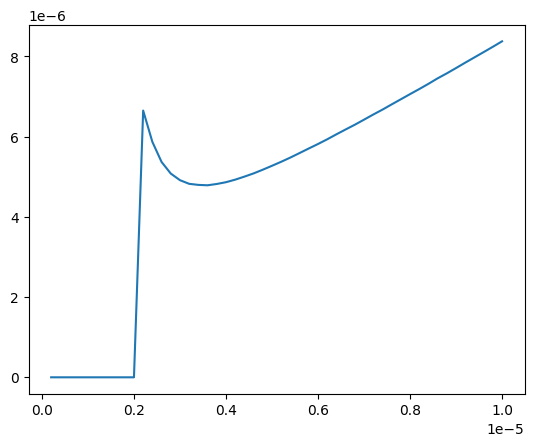

In [63]:

if __name__=='__main__':
    lumapi = imp.load_source("lumpi","C:\\Program Files\\Lumerical\\v232\\api\\python\\lumapi.py")
    os.add_dll_directory("C:\\Program Files\\Lumerical\\v232\\api\\python")
    #core_diameter = 10e-6
    core_diameter = np.arange(10e-6,0.1e-6,-0.2e-6)
    MFD = np.zeros(50)
    clad_diameter = 125e-6
    wavelength = 0.850
    n_core = 1.4654
    n_clad = 1.4590
    req_MFD = 5.0e-6

    mode = lumapi.MODE()
    fde_region = 1.1 * clad_diameter
    fde_region = 20e-6
    fde_resolution = 0.1e-6
    i=0
   
    for i in range(np.shape(core_diameter)[0]):
        mode.addcircle()
        mode.set("name","core")
        mode.set("radius",core_diameter[i]/2)
        mode.set("index", n_core)

        mode.addring()
        mode.set("name","cladding")
        mode.set("outer radius",clad_diameter/2)
        mode.set("inner radius", core_diameter[i]/2)
        mode.set('index', n_clad)

        mode.addfde()
        mode.set("x span", fde_region)
        mode.set("y span", fde_region)
        mode.set("define x mesh by", "maximum mesh step")
        mode.set("define y mesh by", "maximum mesh step")
        mode.set("dx", fde_resolution)
        mode.set("dy", fde_resolution)
        mode.set("x min bc", "symmetric")
        mode.set("x max bc", "PML")
        mode.set("y min bc", "anti-symmetric")
        mode.set("y max bc", "PML")

        mode.set("frequency", c.c / wavelength * 1e6)
        mode.set("search", "in range")
        mode.set("n1", n_core)
        mode.set("n2", n_clad)
        mode.setanalysis("number of trial modes", 1)
        n = mode.findmodes()
        try: 
            
            MFD[i] = A2d(mode.getdata("FDE::data::mode1", "mode effective area"))
        except:
            MFD[i]=0

       
        mode.switchtolayout()
        mode.deleteall()

       
    print("stop")
    plt.plot(core_diameter, MFD)
    
    mode.save()
  







In [64]:
MFD = MFD*1e6
core_diameter=core_diameter*1e6

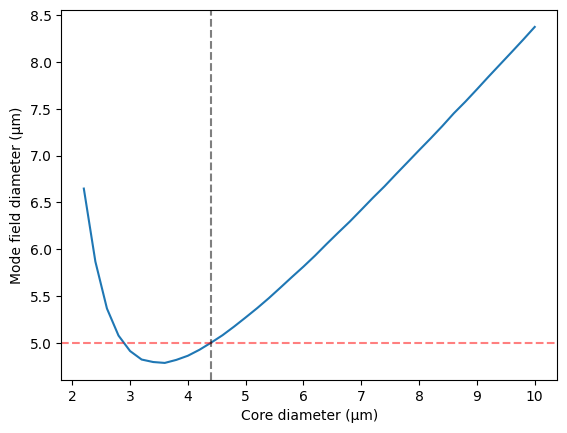

In [65]:

plt.plot(core_diameter[0:40],MFD[0:40])
plt.axhline(y = 5 , color = 'red', linestyle = '--', alpha = 0.5)
plt.axvline(x = 4.4 , color = 'black', linestyle = '--', alpha = 0.5)

plt.xlabel("Core diameter (μm)")
plt.ylabel("Mode field diameter (μm)")

#extraticks= [4.4]
#plt.xticks(list(plt.xticks()[0]) + extraticks)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 


